In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [4]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [8]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [9]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [11]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [12]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [13]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


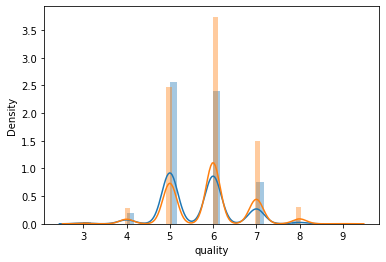

In [14]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [15]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [17]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [18]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


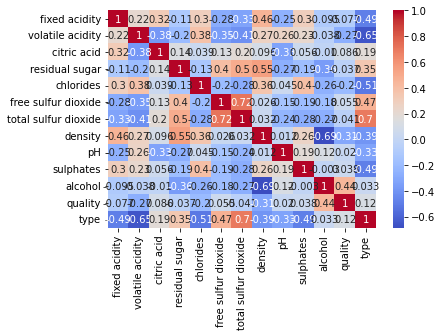

In [19]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [20]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [21]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [22]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [23]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [24]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1357,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1,6,0
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6,0
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5,5,0
1183,6.8,0.66,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5,0
1093,9.2,0.31,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7,0


In [25]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4554,7.4,0.35,0.24,6.0,0.042,28.0,123.0,0.99304,3.14,0.44,11.3,5,1
3211,7.8,0.26,0.49,3.2,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7,1
5052,5.6,0.34,0.30,6.9,0.038,23.0,89.0,0.99266,3.25,0.49,11.1,6,1
5663,5.5,0.28,0.21,1.6,0.032,23.0,85.0,0.99027,3.42,0.42,12.5,5,1
3956,8.9,0.21,0.37,1.2,0.028,20.0,93.0,0.99244,3.20,0.37,11.5,5,1


In [26]:
wine_sample = pd.concat([red_sample, white_sample])

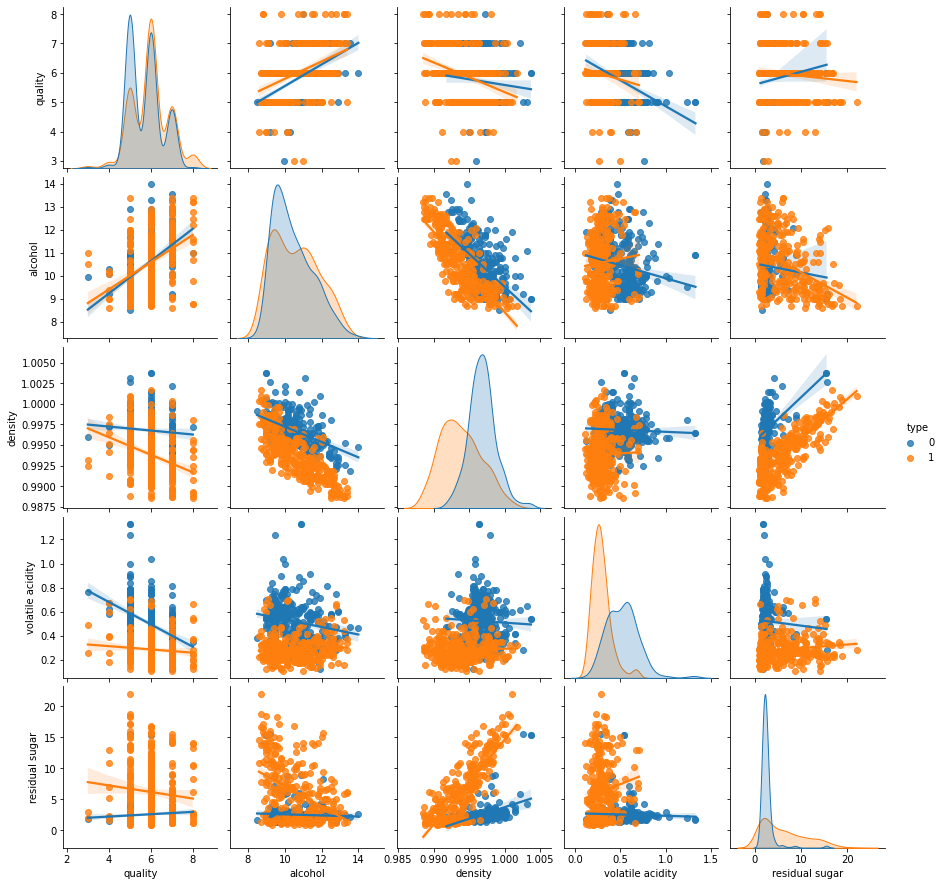

In [27]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [28]:
wine.columns = wine.columns.str.replace(' ','_')

In [85]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']                              #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [31]:
features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [32]:
features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [33]:
features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [34]:
features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [35]:
features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [36]:
features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [37]:
features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [38]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [39]:
X = wine_standard[features]
X_B = wine_standard[features_B]
X_C = wine_standard[features_C]
X_D = wine_standard[features_D]
X_E = wine_standard[features_E]
X_F = wine_standard[features_F]
X_G = wine_standard[features_G]
X_H = wine_standard[features_H]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [40]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)


In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [43]:
print(X_B_train.shape)
print(X_B_test.shape)
print(y_B_train.shape)
print(y_B_test.shape)

(5197, 5)
(1300, 5)
(5197,)
(1300,)


In [44]:
# 모델정의


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model_B = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model_B.fit(X_B_train, y_B_train)

LinearRegression()

In [50]:
prediction = model.predict(X_test)

In [51]:
prediction_B = model_B.predict(X_B_test)

In [52]:
prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [53]:
prediction_B

array([5.65532853, 5.58009165, 6.20560955, ..., 5.40446072, 5.88161446,
       5.32981546])

### 모델평가

In [54]:
from sklearn import metrics

In [55]:
metrics.mean_absolute_error(y_test, prediction)

0.5526961889267856

In [56]:
metrics.mean_absolute_error(y_B_test, prediction_B)

0.5623562106847024

In [57]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.4884991903691603

In [58]:
metrics.mean_squared_error(y_B_test, prediction_B)   

0.49952257208049156

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [60]:
test_model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = 10, 
                                  max_features =0.9,
                                  random_state=31)

In [61]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.44991263, -0.47870985, -0.42840055, -0.47093158, -0.40696158,
       -0.33987749, -0.39503184, -0.48109935, -0.47319203, -0.44150803])

In [62]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

-0.4365624925593471

In [64]:
from tqdm import tqdm

hyper_result =[]

#max_depth = [3,5,7,9,11,13,40,45,50,55,60,65,70,75,80,85]
#max_feature = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

n_estimators = [1000]    # 100~1000 해봄 , 클스룩 neg err은 미세하지만 낮아짐, 그렇다고 squ err이 낮아지는 것을 보장하지 않음

for c in tqdm(n_estimators):
    for i in tqdm(range(80)):
        a = np.random.randint(5,40)
        b = np.random.uniform(0.2,0.9)
        
        model = RandomForestRegressor(n_estimators = c, 
                                    max_depth = a, 
                                    max_features =b,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    random_state=31,
                                    n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

        hyper_result.append({'점수' : score,
                            'n_estimators' : c,
                            'MAX_depth': a,
                            'MAX_features': b,
                             'cv' : d}
                            )
                

        print("현재 스코어는 {0:.5f}".format(score))

  1%|▏         | 1/80 [01:58<2:36:29, 118.86s/it]

현재 스코어는 -0.47691



  2%|▎         | 2/80 [06:04<4:11:17, 193.30s/it]

현재 스코어는 -0.37632



  4%|▍         | 3/80 [09:23<4:11:17, 195.81s/it]

현재 스코어는 -0.38227



  5%|▌         | 4/80 [11:07<3:22:08, 159.59s/it]

현재 스코어는 -0.40495



  6%|▋         | 5/80 [14:08<3:29:25, 167.54s/it]

현재 스코어는 -0.37387



  8%|▊         | 6/80 [17:40<3:45:08, 182.55s/it]

현재 스코어는 -0.37465



  9%|▉         | 7/80 [19:45<3:19:05, 163.63s/it]

현재 스코어는 -0.37205



 10%|█         | 8/80 [23:15<3:34:20, 178.62s/it]

현재 스코어는 -0.37446



 11%|█▏        | 9/80 [27:42<4:03:57, 206.17s/it]

현재 스코어는 -0.37805



 12%|█▎        | 10/80 [30:39<3:49:54, 197.06s/it]

현재 스코어는 -0.37726



 14%|█▍        | 11/80 [34:02<3:48:43, 198.89s/it]

현재 스코어는 -0.37922



 15%|█▌        | 12/80 [35:20<3:03:52, 162.25s/it]

현재 스코어는 -0.50272



 16%|█▋        | 13/80 [37:17<2:45:40, 148.36s/it]

현재 스코어는 -0.42144



 18%|█▊        | 14/80 [41:48<3:24:09, 185.60s/it]

현재 스코어는 -0.37797



 19%|█▉        | 15/80 [45:51<3:39:36, 202.71s/it]

현재 스코어는 -0.37632



 20%|██        | 16/80 [47:11<2:56:55, 165.87s/it]

현재 스코어는 -0.51723



 21%|██▏       | 17/80 [51:40<3:26:46, 196.93s/it]

현재 스코어는 -0.37872



 22%|██▎       | 18/80 [54:23<3:13:02, 186.82s/it]

현재 스코어는 -0.41832



 24%|██▍       | 19/80 [57:55<3:17:35, 194.35s/it]

현재 스코어는 -0.37445



 25%|██▌       | 20/80 [59:45<2:48:54, 168.91s/it]

현재 스코어는 -0.43524



 26%|██▋       | 21/80 [1:04:42<3:24:00, 207.47s/it]

현재 스코어는 -0.37978



 28%|██▊       | 22/80 [1:07:22<3:06:37, 193.05s/it]

현재 스코어는 -0.44497



 29%|██▉       | 23/80 [1:09:42<2:48:27, 177.33s/it]

현재 스코어는 -0.49365



 30%|███       | 24/80 [1:12:18<2:39:22, 170.76s/it]

현재 스코어는 -0.37265



 31%|███▏      | 25/80 [1:17:18<3:12:00, 209.46s/it]

현재 스코어는 -0.37973



 32%|███▎      | 26/80 [1:19:13<2:43:06, 181.23s/it]

현재 스코어는 -0.47691



 34%|███▍      | 27/80 [1:21:21<2:26:00, 165.29s/it]

현재 스코어는 -0.40973



 35%|███▌      | 28/80 [1:25:54<2:51:12, 197.55s/it]

현재 스코어는 -0.37798



 36%|███▋      | 29/80 [1:29:57<2:59:34, 211.26s/it]

현재 스코어는 -0.37635



 38%|███▊      | 30/80 [1:34:23<3:09:38, 227.57s/it]

현재 스코어는 -0.40035



 39%|███▉      | 31/80 [1:36:27<2:40:28, 196.50s/it]

현재 스코어는 -0.37603



 40%|████      | 32/80 [1:41:23<3:01:10, 226.46s/it]

현재 스코어는 -0.38249



 41%|████▏     | 33/80 [1:43:21<2:31:46, 193.76s/it]

현재 스코어는 -0.47691



 42%|████▎     | 34/80 [1:47:53<2:46:40, 217.40s/it]

현재 스코어는 -0.37797



 44%|████▍     | 35/80 [1:52:55<3:01:58, 242.62s/it]

현재 스코어는 -0.37954



 45%|████▌     | 36/80 [1:56:04<2:46:17, 226.76s/it]

현재 스코어는 -0.37387



 46%|████▋     | 37/80 [1:59:39<2:39:48, 222.98s/it]

현재 스코어는 -0.37439



 48%|████▊     | 38/80 [2:04:02<2:44:40, 235.24s/it]

현재 스코어는 -0.40035



 49%|████▉     | 39/80 [2:06:59<2:28:47, 217.74s/it]

현재 스코어는 -0.38206



 50%|█████     | 40/80 [2:09:23<2:10:17, 195.44s/it]

현재 스코어는 -0.46036



 51%|█████▏    | 41/80 [2:12:30<2:05:29, 193.06s/it]

현재 스코어는 -0.37384



 52%|█████▎    | 42/80 [2:16:12<2:07:40, 201.58s/it]

현재 스코어는 -0.40757



 54%|█████▍    | 43/80 [2:20:41<2:16:55, 222.05s/it]

현재 스코어는 -0.37769



 55%|█████▌    | 44/80 [2:22:18<1:50:36, 184.34s/it]

현재 스코어는 -0.42882



 56%|█████▋    | 45/80 [2:26:52<2:03:19, 211.41s/it]

현재 스코어는 -0.37872



 57%|█████▊    | 46/80 [2:30:57<2:05:22, 221.25s/it]

현재 스코어는 -0.37630



 59%|█████▉    | 47/80 [2:33:03<1:46:02, 192.81s/it]

현재 스코어는 -0.40973



 60%|██████    | 48/80 [2:35:15<1:33:09, 174.68s/it]

현재 스코어는 -0.47676



 61%|██████▏   | 49/80 [2:37:12<1:21:15, 157.27s/it]

현재 스코어는 -0.47691



 62%|██████▎   | 50/80 [2:39:18<1:13:58, 147.95s/it]

현재 스코어는 -0.37163



 64%|██████▍   | 51/80 [2:42:26<1:17:20, 160.03s/it]

현재 스코어는 -0.41813



 65%|██████▌   | 52/80 [2:45:32<1:18:12, 167.58s/it]

현재 스코어는 -0.37392



 66%|██████▋   | 53/80 [2:47:36<1:09:33, 154.59s/it]

현재 스코어는 -0.51202



 68%|██████▊   | 54/80 [2:49:21<1:00:33, 139.74s/it]

현재 스코어는 -0.40495



 69%|██████▉   | 55/80 [2:53:49<1:14:18, 178.34s/it]

현재 스코어는 -0.37809



 70%|███████   | 56/80 [2:56:52<1:11:51, 179.66s/it]

현재 스코어는 -0.37367



 71%|███████▏  | 57/80 [2:58:12<57:24, 149.75s/it]  

현재 스코어는 -0.51723



 72%|███████▎  | 58/80 [3:00:17<52:11, 142.34s/it]

현재 스코어는 -0.37154



 74%|███████▍  | 59/80 [3:02:23<48:05, 137.40s/it]

현재 스코어는 -0.37254



 75%|███████▌  | 60/80 [3:05:54<53:11, 159.55s/it]

현재 스코어는 -0.37446



 76%|███████▋  | 61/80 [3:09:53<58:01, 183.22s/it]

현재 스코어는 -0.37632



 78%|███████▊  | 62/80 [3:13:02<55:32, 185.15s/it]

현재 스코어는 -0.39064



 79%|███████▉  | 63/80 [3:14:37<44:44, 157.92s/it]

현재 스코어는 -0.42882



 80%|████████  | 64/80 [3:17:41<44:10, 165.66s/it]

현재 스코어는 -0.37394



 81%|████████▏ | 65/80 [3:20:58<43:46, 175.09s/it]

현재 스코어는 -0.44549



 82%|████████▎ | 66/80 [3:24:32<43:38, 187.01s/it]

현재 스코어는 -0.43123



 84%|████████▍ | 67/80 [3:27:08<38:28, 177.58s/it]

현재 스코어는 -0.37236



 85%|████████▌ | 68/80 [3:29:06<31:55, 159.61s/it]

현재 스코어는 -0.38369



 86%|████████▋ | 69/80 [3:31:25<28:10, 153.66s/it]

현재 스코어는 -0.44557



 88%|████████▊ | 70/80 [3:33:51<25:13, 151.36s/it]

현재 스코어는 -0.38136



 89%|████████▉ | 71/80 [3:35:56<21:29, 143.28s/it]

현재 스코어는 -0.37278



 90%|█████████ | 72/80 [3:37:59<18:18, 137.25s/it]

현재 스코어는 -0.37603



 91%|█████████▏| 73/80 [3:42:57<21:38, 185.54s/it]

현재 스코어는 -0.37973



 92%|█████████▎| 74/80 [3:46:15<18:54, 189.07s/it]

현재 스코어는 -0.44549



 94%|█████████▍| 75/80 [3:49:19<15:38, 187.73s/it]

현재 스코어는 -0.37383



 95%|█████████▌| 76/80 [3:53:11<13:23, 200.95s/it]

현재 스코어는 -0.39917



 96%|█████████▋| 77/80 [3:55:45<09:20, 186.78s/it]

현재 스코어는 -0.37231



 98%|█████████▊| 78/80 [3:59:01<06:19, 189.78s/it]

현재 스코어는 -0.40727



 99%|█████████▉| 79/80 [4:03:00<03:24, 204.26s/it]

현재 스코어는 -0.37637



100%|██████████| 1/1 [4:06:58<00:00, 14818.74s/it]

현재 스코어는 -0.37629


In [65]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
57,-0.371543,1000,33,0.259716,20
49,-0.371634,1000,34,0.279022,20
6,-0.372051,1000,26,0.256219,20
76,-0.372311,1000,38,0.313569,20
66,-0.372363,1000,32,0.328223,20
...,...,...,...,...,...
22,-0.493655,1000,6,0.830012,20
11,-0.502717,1000,6,0.373401,20
52,-0.512025,1000,5,0.855463,20
15,-0.517231,1000,5,0.480080,20


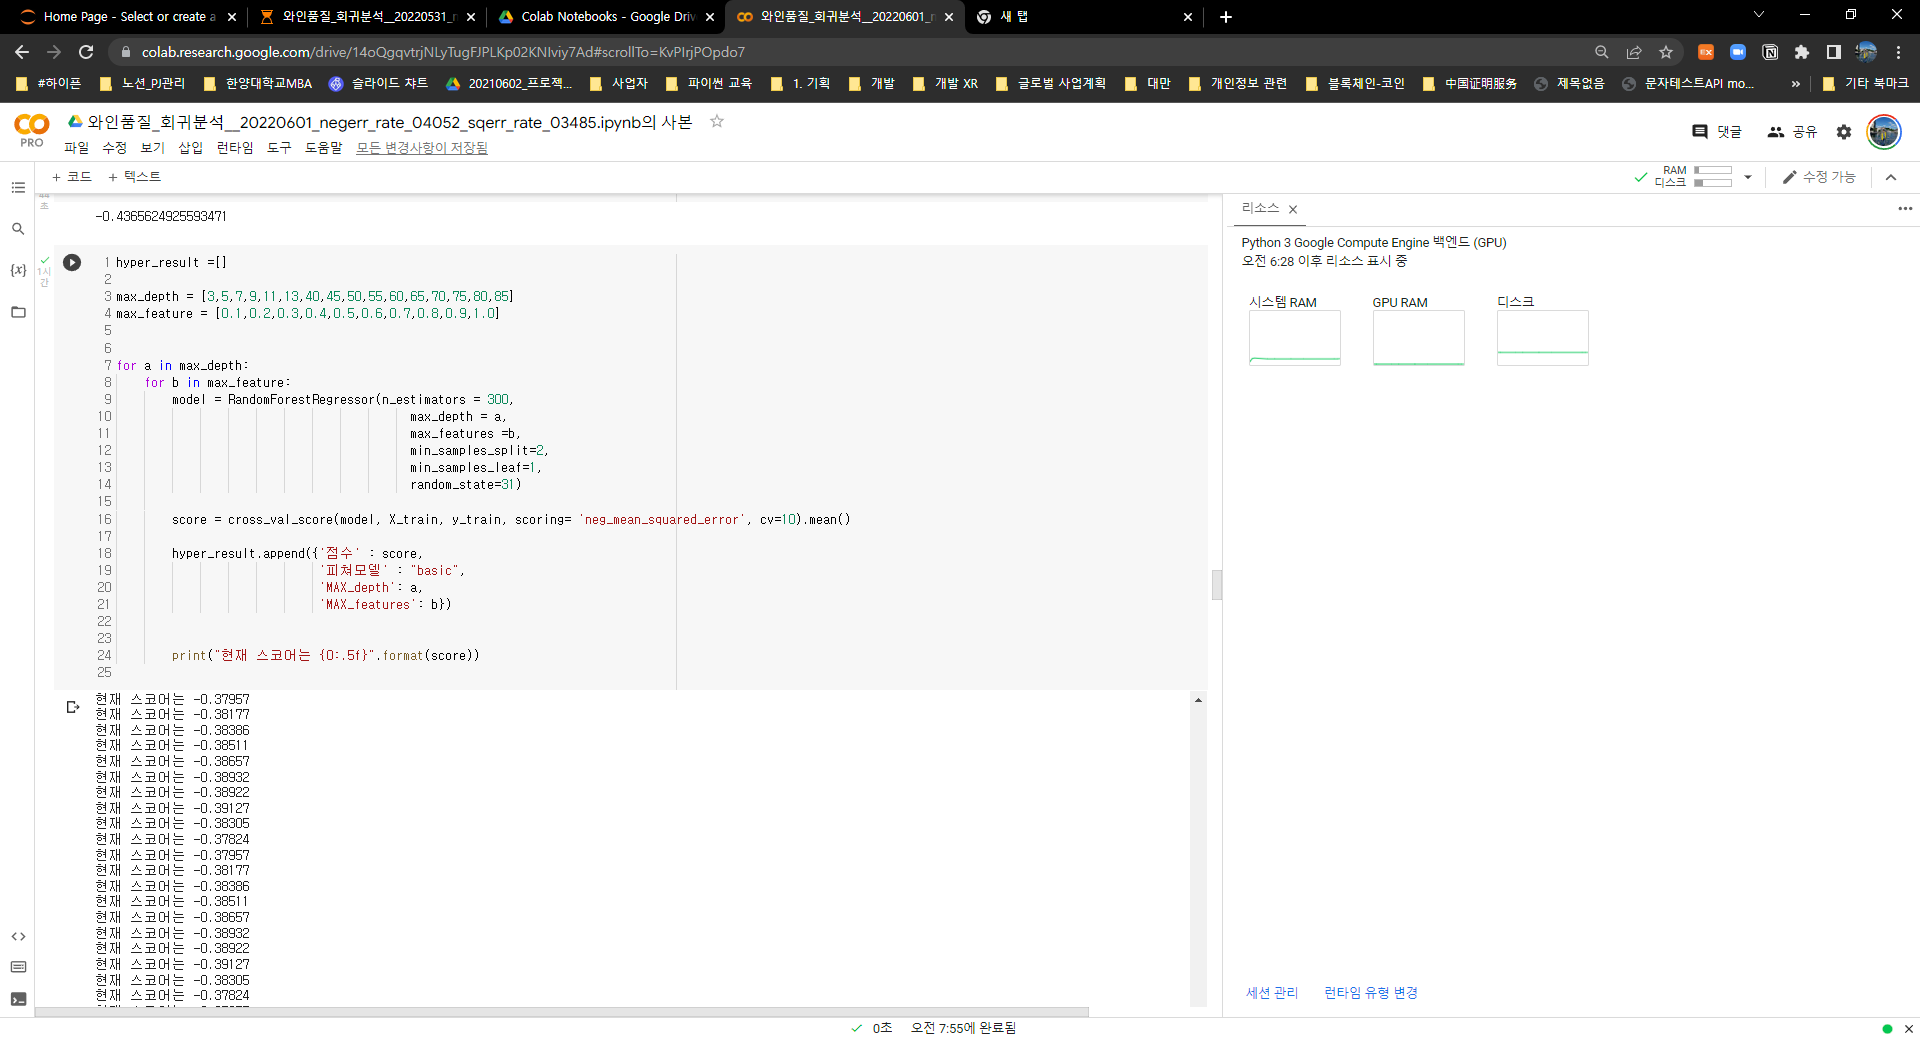


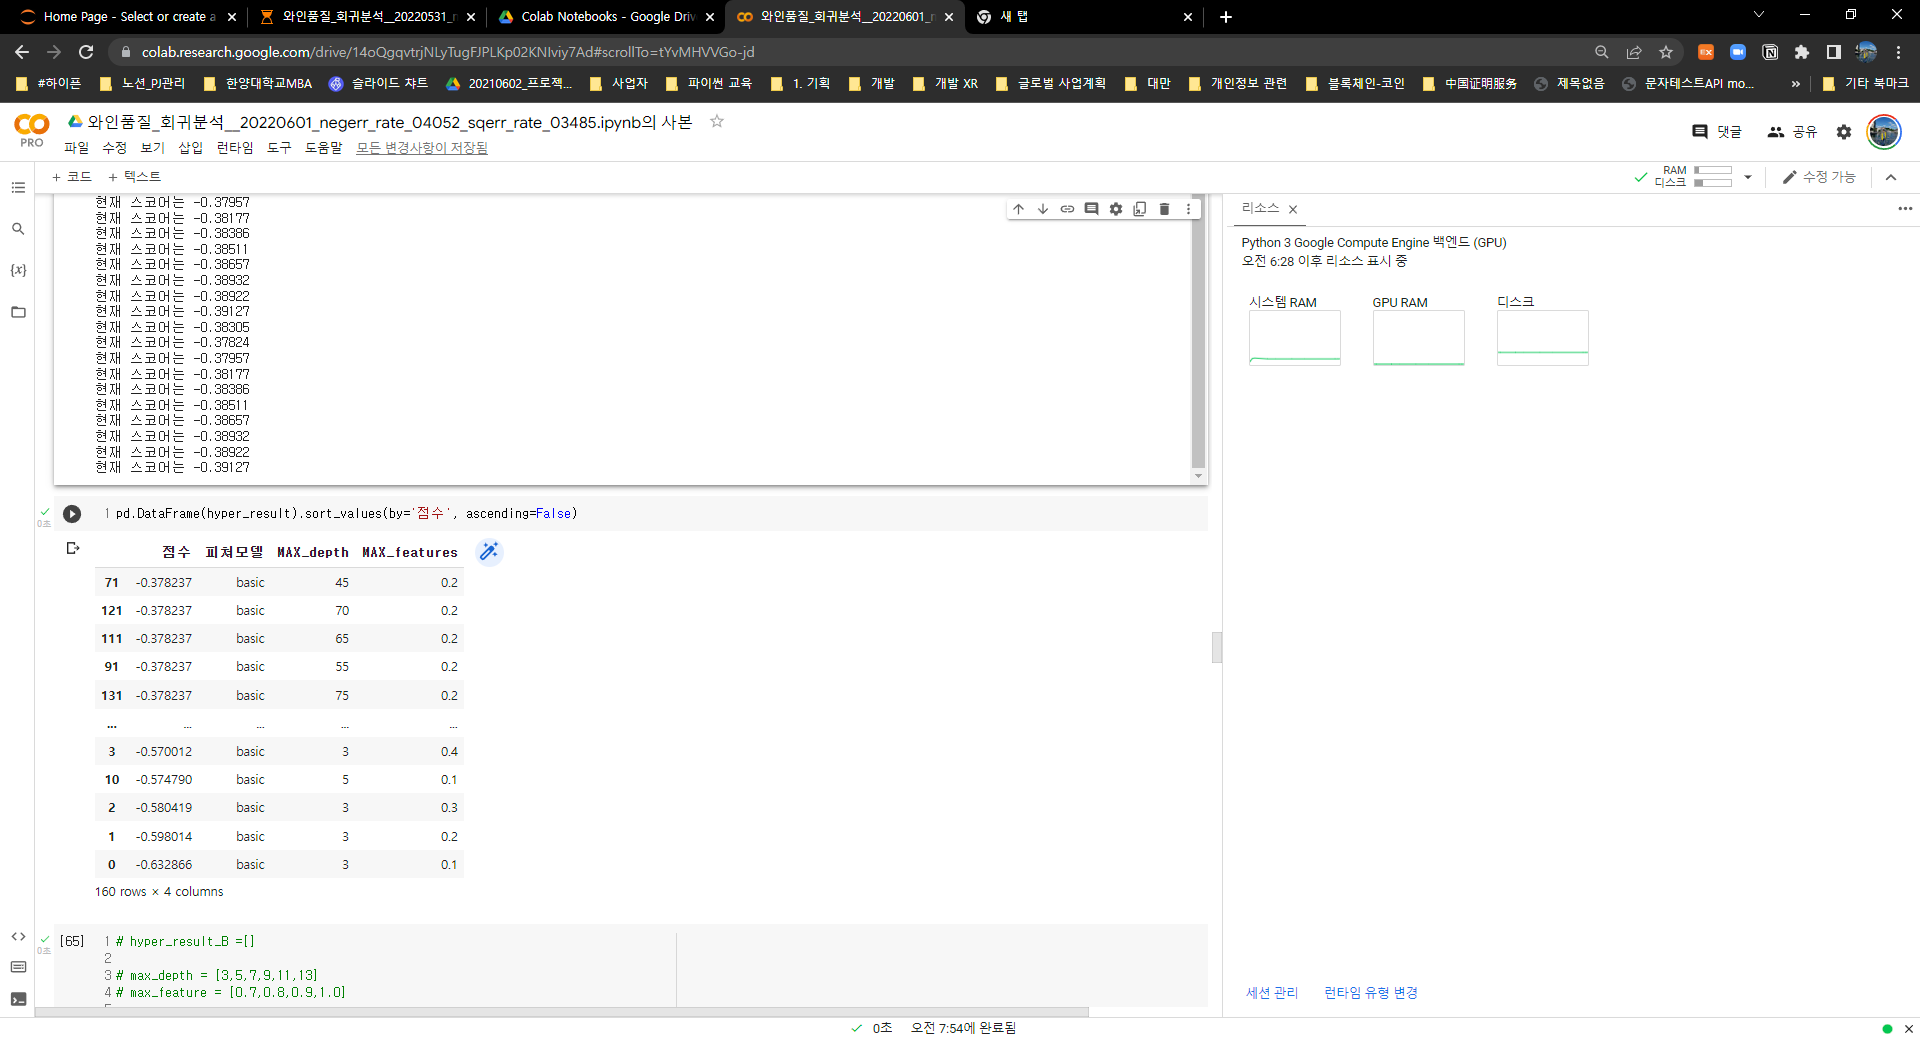


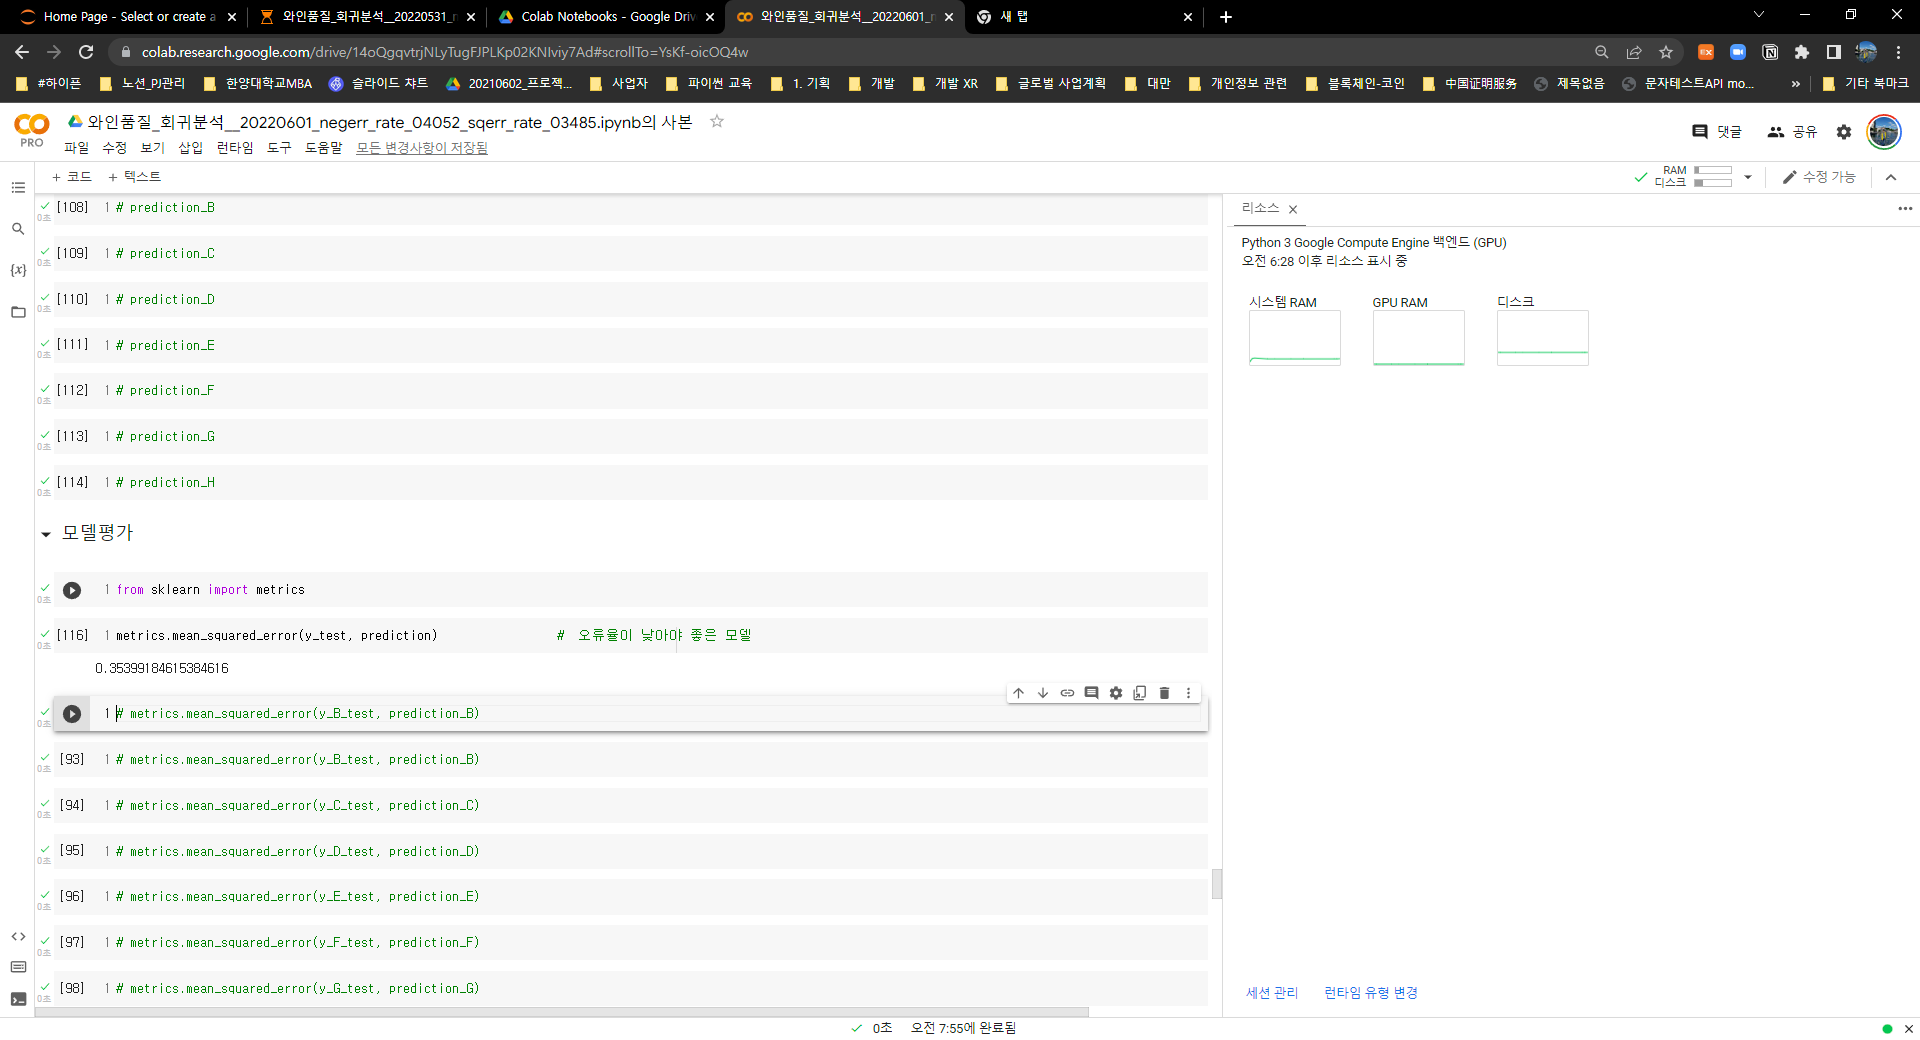

In [66]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())

최소에러율
-0.3715428458506328
 
평균에러율
-0.40314669495454564


In [67]:
# 최종 모델정의

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [69]:
Finalmodel = RandomForestRegressor()

In [70]:
Finalmodel.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
prediction = Finalmodel.predict(X_test)

In [72]:
prediction

array([5.98, 5.7 , 6.81, ..., 5.72, 6.56, 5.43])

### 모델평가

In [73]:
from sklearn import metrics

In [74]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.35613700000000004

### 상단 개인작업구간

In [75]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [76]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [77]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [78]:
formula_model = ols(formula, data=wine).fit()          #

In [79]:
formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:56:08   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3297      8.509      4.270      0.000      19.649      53.010
alcohol              0.3114      0.013     24.164      0.000       0.286       0.337
density            -33.1933      8.446     -3.930      0.000     -49.750     -16.637
residual_sugar       0.0353      0.004      9.082      0.000       0.028       0.043
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -1.7047      0.074    -23.005      0.000      -1.850      -1.559
chlorides           -0.5035      0.321     -1.569      0.117      -1.133       0.126
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#density  -33에 대한 확인
wine.head()
#0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,...,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,...,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,...,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,...,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,...,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,...,3.51,0.56,9.4,5,0


### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [81]:
formula_model = ols(formula, data=wine_standard).fit()

In [82]:
formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:56:09   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1646      0.036    169.618      0.000       6.093       6.236
alcohol              0.3714      0.015     24.164      0.000       0.341       0.402
density             -0.0995      0.025     -3.930      0.000      -0.149      -0.050
residual_sugar       0.1679      0.018      9.082      0.000       0.132       0.204
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -0.2807      0.012    -23.005      0.000      -0.305      -0.257
chlorides           -0.0176      0.011     -1.569      0.117      -0.040       0.004
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [84]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:56:09   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""